In [32]:
from sklearn import neighbors
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

C:\Users\mamad\anaconda2\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


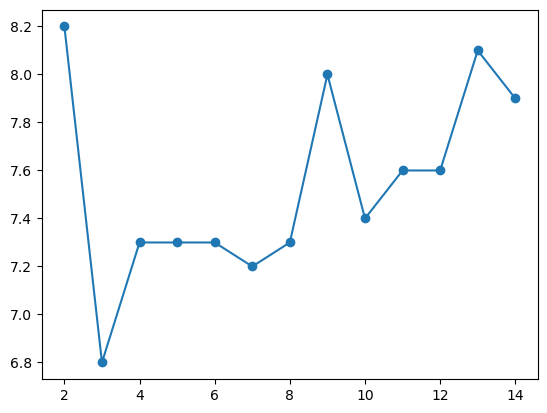

In [71]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
#rcuperer 5000 index parmi 70000
index = np.random.randint(70000 , size = 5000)

dataX = mnist.data[index]
datay = mnist.target[index]


X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size=0.2, random_state=42) 

#entrainer notre model

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#mettre tous les erreur dans un graphe en fonction de la valeur de K (2 a 15)
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()
 






In [10]:
print(knn.score(X_test , y_test))

0.92


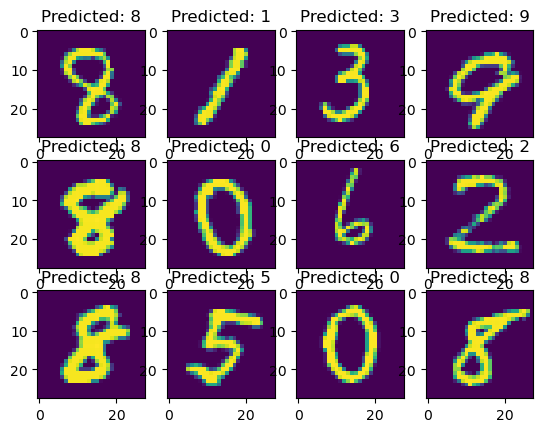

In [72]:
#dabord prenons le K avec l'eereur la plus basse

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train , y_train)

#predire
prediction = knn.predict(X_test)

# On redimensionne les données sous forme d'images

images = X_test.reshape(-1 , 28*28)


#choisir un echentillon parmi les donne de test

echantillon = np.random.randint(images.shape[0] , size=12)

#afficher les images et leur predictions

fig,ax = plt.subplots(3,4) #cree une grille de 3 ligne et 4  colonnes

for index, value in enumerate(echantillon):
    plt.subplot(3,4 , index+1)
    plt.imshow(images[value].reshape(28,28))
    plt.title('Predicted: {}'.format( prediction[value]) )

plt.show()
